In [31]:
# Werkcollege Imaginaire getallen

# Als je bepaalde syntax niet kent, ga eerst naar de documentatie:
# >   https://www.python.org/doc/     (algemene python documentatie)
# >   https://docs.python.org/3/library/numbers.html?highlight=complex%20numbers#numbers.Complex  (complexe number klasse)
# >   

In [32]:
# Imports

import matplotlib.pyplot as plt
import numpy as np
import math
import random
from tabulate import tabulate

import wave
import scipy.fft
import scipy.signal
import scipy.io.wavfile as wavfile
import os
from IPython.display import Audio

from playsound import playsound


In [33]:
# Doel van dit werkcollege:

# We gaan 2 signalen van muziekinstrumenten door elkaar gooien en opnieuw distilleren met wat we geleerd hebben over --
# de Fourier transformatie


folder = "C:/Users/jvano/Documents/SEC_Master/Vakken/BetaDesign/WAV's/"
Instrumenten = {"Bass":"33_ac_bass.wav","Panflute":"76_panflute.wav"}

#1 Beluister onderstaande instrumenten

#playsound(folder+Instrumenten["Bass"])
playsound(folder+Instrumenten["Panflute"])

[-923 -911 -546 -139  470 1021 1086 2214 3672 4992]
3040 946


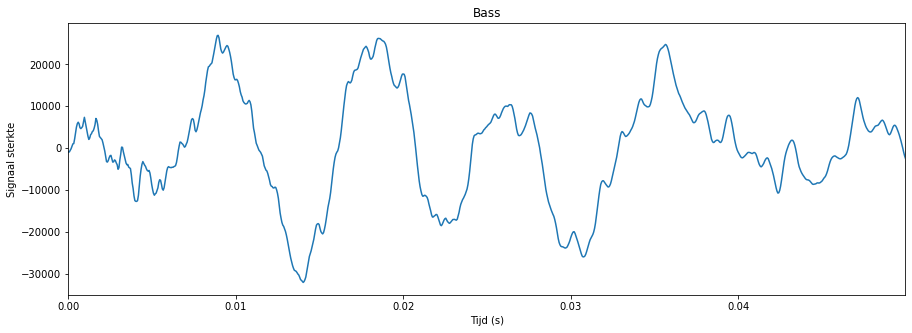

[ 156  255  262  613  807  851 1056  719  235 1104]
2400 942


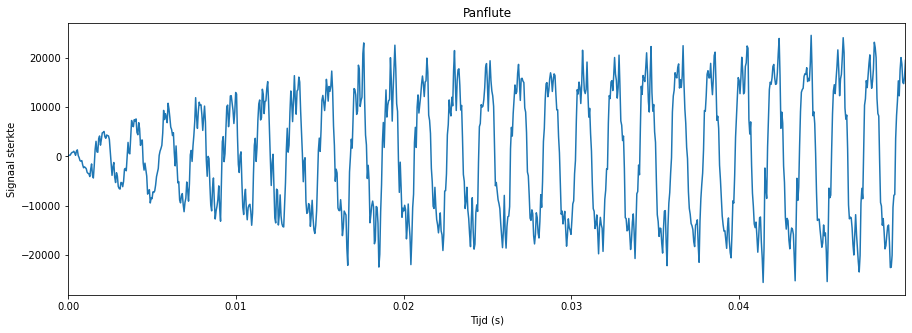

In [34]:
for instrument in Instrumenten:
    wav_obj = wave.open(folder+Instrumenten[instrument],'rb')
    sample_freq = wav_obj.getframerate()   #De frequentie van sampling
    n_samples = wav_obj.getnframes()       #Het aantal samples

    signal_wave = wav_obj.readframes(n_samples)
    signal_array = np.frombuffer(signal_wave, dtype=np.int16)  #Dit is ons opgeslagen signaal als lijst van amplitudes
    
    print(signal_array[:10]) #De eerste 10 nummers (ter inzicht)

    
    ### //// ###
    plot_samples =int(0.05*sample_freq)
    t_audio = plot_samples/sample_freq
    
    print(n_samples,plot_samples)
    times = np.linspace(0, t_audio, num=plot_samples)
    plt.figure(figsize=(15, 5))
    plt.plot(times, signal_array[:plot_samples])
    plt.title(instrument)
    plt.ylabel('Signaal sterkte')
    plt.xlabel('Tijd (s)')
    plt.xlim(0, t_audio)
    plt.show()
    xz = signal_array[:plot_samples]
    xzz = signal_array
    ### //// ####

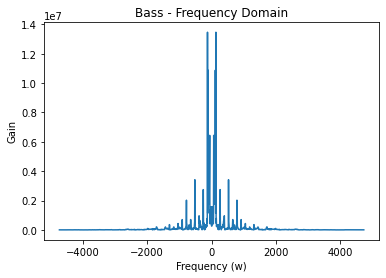

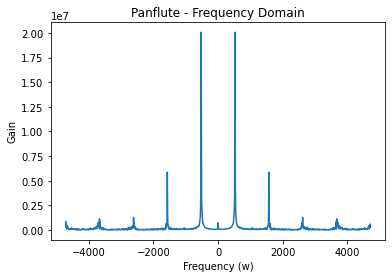

In [35]:
## FFT - We gebruiken voor beide 
for instrument in Instrumenten:
    wav_obj = wave.open(folder+Instrumenten[instrument],'rb')
    sample_freq = wav_obj.getframerate()
    n_samples = wav_obj.getnframes()

    signal_wave = wav_obj.readframes(n_samples)
    signal_array = np.frombuffer(signal_wave, dtype=np.int16)
    
    T = 1/sample_freq     # Tijd tussen 2 samples
    N = n_samples

    x_f_ins = scipy.fft.fftfreq(N,T)  # Dit geeft ons de frequentie bins waarin de signalen verdeelt worden na fft.
    
    y_f_ins = scipy.fft.fft(signal_array)

    #2. Schrijf een eigen functie om de FFT te berekenen en gebruik. Levert dit hetzelfde resultaat op?
    
    #def custom_fft(signal):
        
    #    return fft_signal
    #y_f = custom_fft(signal_array)
    
    
    ### //// ###
    x_f_plot_ins = np.concatenate([x_f_ins[-x_f_ins.size//4:],x_f_ins[:x_f_ins.size//4]])
    y_f_plot_ins = np.concatenate([y_f_ins[-y_f_ins.size//4:],y_f_ins[:y_f_ins.size//4]])
    
    plt.figure()
    plt.plot(x_f_plot_ins, np.abs(y_f_plot_ins))
    plt.title(instrument+' - Frequency Domain')
    plt.ylabel('Gain')
    plt.xlabel('Frequency (w)')
    plt.show()
    ### //// ###

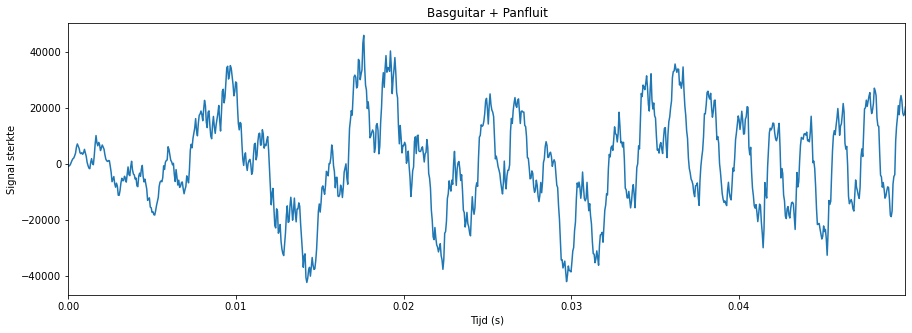

In [36]:
## Signalen optellen
# We tellen de signalen op voor de panfluit en de bassguitar in het tijdsdomein.

### //// ###
wav_obj_a = wave.open(folder+Instrumenten["Panflute"],'rb')
sample_freq_a = wav_obj_a.getframerate()
n_samples_a = wav_obj_a.getnframes()
n_shared_samples = n_samples_a  

signal_array_added = np.zeros(n_shared_samples)

for instrument in Instrumenten:
    wav_obj = wave.open(folder+Instrumenten[instrument],'rb')
    sample_freq = sample_freq_a
    n_samples = n_shared_samples

    signal_wave = wav_obj.readframes(n_samples)
    signal_array = np.frombuffer(signal_wave, dtype=np.int16)
    
    plot_samples =int(0.05*sample_freq)
    t_audio = plot_samples/sample_freq
    
    ##signal_array = signal_array[:plot_samples]
    signal_array = scipy.signal.resample(signal_array,n_shared_samples)  # We re-samplen naar de sample frequentie van de panfluit
    signal_array_added += signal_array
    
times = np.linspace(0, t_audio, num=plot_samples)
plt.figure(figsize=(15, 5))
plt.plot(times, signal_array_added[:plot_samples])
plt.title("Basguitar + Panfluit")
plt.ylabel('Signal sterkte')
plt.xlabel('Tijd (s)')
plt.xlim(0, t_audio)
plt.show()
xs = signal_array_added[:plot_samples]
### //// ###

In [37]:
# Audio van het gecombineerde signaal (druk knop en merk het veschil met de individuele geluiden)
Audio(signal_array_added[:plot_samples], rate=sample_freq_a)

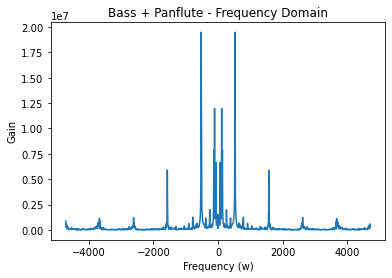

In [38]:
## FFT 
# Hier zorgen we dat we het gecombineerde signaal Fourier transformeren
T = 1/sample_freq_a
N = n_shared_samples

x_f_combined = scipy.fft.fftfreq(N,T)
y_f_combined = scipy.fft.fft(signal_array_added)


x_f_plot_c = np.concatenate([x_f_combined[-x_f_combined.size//4:],x_f_combined[:x_f_combined.size//4]])
y_f_plot_c = np.concatenate([y_f_combined[-y_f_combined.size//4:],y_f_combined[:y_f_combined.size//4]])

### //// ###
plt.figure()
plt.plot(x_f_plot_c, np.abs(y_f_plot_c))
plt.title('Bass + Panflute - Frequency Domain')
plt.ylabel('Gain')
plt.xlabel('Frequency (w)')
plt.show()
### //// ###

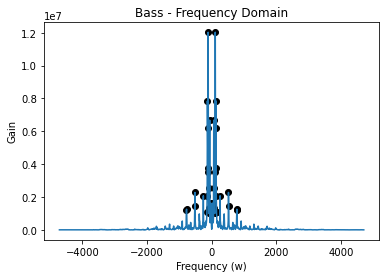

Karakteristieke frequenties Bass: [15.713333333333335, 23.57, 39.28333333333334, 62.85333333333334, 70.71000000000001, 78.56666666666668, 86.42333333333335, 94.28, 102.13666666666667, 109.99333333333334, 117.85000000000001, 125.70666666666668, 133.56333333333333, 141.42000000000002, 149.27666666666667, 259.27000000000004, 518.5400000000001, 526.3966666666668, 777.8100000000001, 785.6666666666667, -785.6666666666667, -777.8100000000001, -526.3966666666668, -518.5400000000001, -259.27000000000004, -149.27666666666667, -141.42000000000002, -133.56333333333333, -125.70666666666668, -117.85000000000001, -109.99333333333334, -102.13666666666667, -94.28, -86.42333333333335, -78.56666666666668, -70.71000000000001, -62.85333333333334, -39.28333333333334, -23.57, -15.713333333333335]


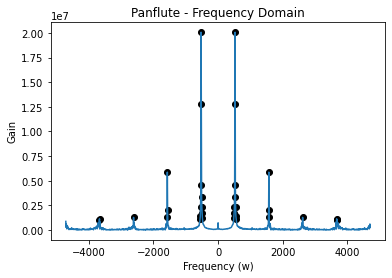

Karakteristieke frequenties Panflute: [487.1133333333334, 494.97, 502.8266666666667, 510.6833333333334, 518.5400000000001, 526.3966666666668, 534.2533333333333, 542.11, 549.9666666666667, 557.8233333333334, 1563.476666666667, 1571.3333333333335, 1579.19, 2616.2700000000004, 3669.0633333333335, 3676.9200000000005, -3676.9200000000005, -3669.0633333333335, -2616.2700000000004, -1579.19, -1571.3333333333335, -1563.476666666667, -557.8233333333334, -549.9666666666667, -542.11, -534.2533333333333, -526.3966666666668, -518.5400000000001, -510.6833333333334, -502.8266666666667, -494.97, -487.1133333333334]


In [39]:
## Pieken identificeren
# In deze sectie gaan we pieken identificeren.
# 3. Waarom doen we dit en hoe zouden we dit kunnen doen?

for instrument in Instrumenten:
    wav_obj = wave.open(folder+Instrumenten[instrument],'rb')
    sample_freq = sample_freq_a
    n_samples = n_shared_samples

    signal_wave = wav_obj.readframes(n_samples)
    signal_array = np.frombuffer(signal_wave, dtype=np.int16)
    
    T = 1/sample_freq
    N = n_samples

    x_f_ins2 = scipy.fft.fftfreq(N,T)
    y_f_ins2 = scipy.fft.fft(signal_array)

    x_f_plot = np.concatenate([x_f_ins2[-x_f_ins2.size//4:],x_f_ins2[:x_f_ins2.size//4]])
    y_f_plot = np.concatenate([y_f_ins2[-y_f_ins2.size//4:],y_f_ins2[:y_f_ins2.size//4]])


    x_maximums = []
    y_maximums = []

#4. We kijken nu waar de pieken hoger zijn dan 10^6. We zouden deze waarde kunnen veranderen. Welke trade-off bestaat bij het kiezen van deze waarde?
# Hint: Als dit niet duidelijk is, kom terug op deze vraag na de rest van het werkcollege.
    
    for i in range(len(y_f_ins2)):
        if abs(y_f_ins2[i]) > 10**6:
            y_maximums.append(abs(y_f_ins2[i]))
            x_maximums.append(x_f_ins2[i])

    plt.figure()
    plt.plot(x_f_plot, np.abs(y_f_plot))
    plt.title(instrument+' - Frequency Domain')
    plt.ylabel('Gain')
    plt.xlabel('Frequency (w)')
    plt.scatter(x_maximums, y_maximums, color='k')
    plt.show()
    
    print("Karakteristieke frequenties "+ instrument +": "+str(x_maximums))

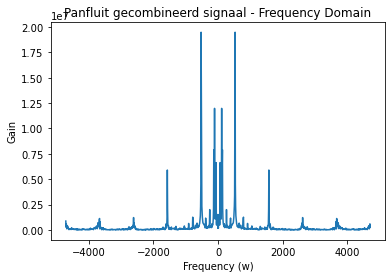

In [40]:
## Een Filter maken

#5. Wat valt op aan de frequenties van de pieken van de panfluit? Kun je een wiskundige formule maken van het patroon?

#6. Gebaseerd op je observaties, maak een filter waarmee je deze frequenties eruit filtert: 
x_f_input = x_f_combined
y_f_input = y_f_combined

def Panfluitfilter(x_freq,y_freq):
    for index in range(len(x_freq)):
        if not (((round(x_freq[index]) % 1050 >= 515) and (round(x_freq[index]) % 1050 <= 535))):
            y_freq[index] = 0+0j          
    return x_freq, y_freq
        
plt.figure
plt.plot(x_f_plot_c,abs(y_f_plot_c))
plt.title('Panfluit gecombineerd signaal - Frequency Domain')
plt.ylabel('Gain')
plt.xlabel('Frequency (w)')
plt.show()    
    



2400 2400


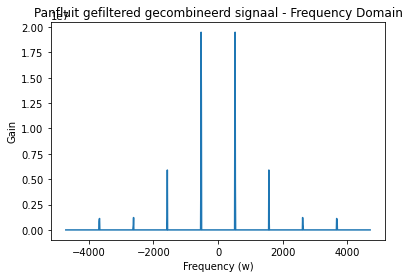

Karakteristieke frequenties Panflute: [-3676.9200000000005, -3669.0633333333335, -2616.2700000000004, -1579.19, -1571.3333333333335, -534.2533333333333, -526.3966666666668, -518.5400000000001, 518.5400000000001, 526.3966666666668, 534.2533333333333, 1571.3333333333335, 1579.19, 2616.2700000000004, 3669.0633333333335, 3676.9200000000005]


In [41]:
x_f_fluit_filtered, y_f_fluit_filtered = Panfluitfilter(x_f_input,y_f_input)

### //// ###
x_f_2 = np.concatenate([x_f_fluit_filtered[-x_f_fluit_filtered.size//4:],x_f_fluit_filtered[:x_f_fluit_filtered.size//4]])
y_f_2 = np.concatenate([y_f_fluit_filtered[-y_f_fluit_filtered.size//4:],y_f_fluit_filtered[:y_f_fluit_filtered.size//4]])

plt.figure
plt.plot(x_f_2, abs(y_f_2))
plt.title('Panfluit gefiltered gecombineerd signaal - Frequency Domain')
plt.ylabel('Gain')
plt.xlabel('Frequency (w)')
plt.show()
### //// ###

C:\Users\jvano\anaconda3\envs\Fourier_Project\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


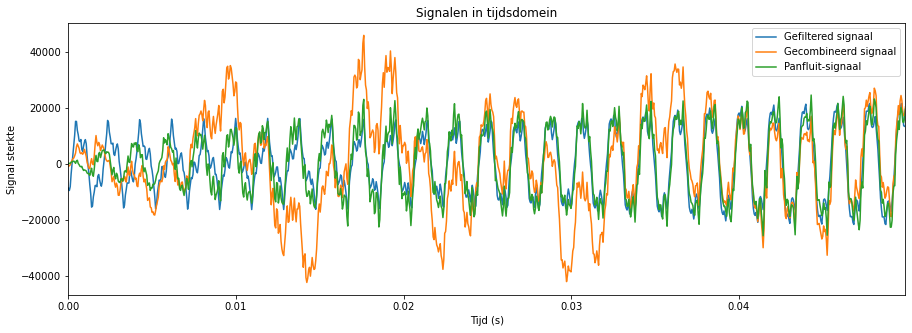

In [48]:
## ifft - De inverse Fourier Transformatie (frequentie domein - tijdsdomein)
y_f_filtered = scipy.fft.ifft(y_f_fluit_filtered)

times = np.linspace(0, t_audio, num= plot_samples)
plt.figure(figsize=(15, 5))
plt.plot(times, y_f_filtered[:plot_samples])
plt.plot(times, xs)
plt.plot(times, xz)
plt.title("Signalen in tijdsdomein")
plt.ylabel('Signal sterkte')
plt.xlabel('Tijd (s)')
plt.xlim(0, t_audio)
plt.legend(['Gefiltered signaal','Gecombineerd signaal','Panfluit-signaal'])
plt.show()


In [43]:
## Alleen de panfluit
Audio(xzz, rate=sample_freq_a)

In [44]:
## De panfluit met de bassguitar erdoorheen
Audio(signal_array_added, rate=sample_freq_a)

In [45]:
## Het gecombineerde signaal gefiltered op de karateristieke frequenties van de panfluit
Audio(y_f_filtered, rate=sample_freq_a)

C:\Users\jvano\anaconda3\envs\Fourier_Project\lib\site-packages\IPython\lib\display.py:172: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [ ]:
#7. Hebben we een goede filter gemaakt? Discussieer wat de filter goed en slecht doet en hoe de fourier transformatie geholpen heeft. Heb je al een idee om de filter te verbeteren?